# CREDIT RISK ANALYSIS

## I. Problem Definition

Credit risk analysis plays a crucial role in the financial decision-making process of lending institutions. The objective of this project is to analyze credit risk using the provided dataset, with a strong emphasis on building a machine learning model to predict whether a loan applicant is a 'Bad Borrower' or a 'Good Borrower.' 

This notebook will outline the methodologies, data preprocessing techniques, and machine learning models employed to achieve this goal, ultimately helping financial institutions make informed and data-driven lending decisions by accurately assessing the risk associated with each applicant.

Dataset: https://www.kaggle.com/datasets/ranadeep/credit-risk-dataset/data

## II. Data Exploration and Preprocessing

We'll look at the distribution of the target variable and how different features relate to it.

- Load Dataset

- Data Understanding

- Target Variable Definition and Distribution: Check the distribution of the 'loan_class' variable.

- Feature Distributions: Visualize the distribution of numerical features. Analyze categorical features.

- Correlation Analysis: Compute the correlation matrix to understand relationships between features.

- Visualization: Create plots to visualize the relationship between features and the target variable

### Load Dataset

> Load the dataset from 'loan.csv' and display the first few rows for inspection.

In [407]:
import pandas as pd

# Load the dataset
loan_data = pd.read_csv('loan.csv')

# Display the first few rows
loan_data.head()

C:\Users\claud\AppData\Local\Temp\ipykernel_29464\3629028213.py:4: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv('loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataset has been loaded successfully and contains 74 columns. Let me know if you'd like to explore specific columns or perform any preprocessing steps.

### Data Understanding and Data Preparation

In [408]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

In [409]:
# Calculate the percentage of missing values for each column
missing_percentage = loan_data.isnull().mean() * 100

# Identify columns with more than 70% missing values
columns_to_drop = missing_percentage[missing_percentage > 70].index.tolist()
columns_to_drop

['desc',
 'mths_since_last_record',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m']

The following columns have more than 70% missing values and can be considered for dropping:

- desc
- mths_since_last_record
- mths_since_last_major_derog
- annual_inc_joint
- dti_joint
- verification_status_joint
- open_acc_6m
- open_il_6m
- open_il_12m
- open_il_24m
- mths_since_rcnt_il
- total_bal_il
- il_util
- open_rv_12m
- open_rv_24m
- max_bal_bc
- all_util
- inq_fi
- total_cu_tl
- inq_last_12m

In [410]:
# Drop columns with more than 70% missing values
filtered_data = loan_data.drop(columns=columns_to_drop)

The columns with more than 70% missing values have been dropped, and the new dataset is stored as 'filtered_data'. Let me know if you need further assistance.

In [411]:
filtered_data.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,171.62,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,119.66,NaN,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,649.91,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN


In [412]:
categorical_data = filtered_data.select_dtypes(include=['object'])
categorical_data.head(3)

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
0,36 months,B,B2,NaN,10+ years,RENT,Verified,Dec-2011,Fully Paid,n,...,credit_card,Computer,860xx,AZ,Jan-1985,f,Jan-2015,NaN,Jan-2016,INDIVIDUAL
1,60 months,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-2011,Charged Off,n,...,car,bike,309xx,GA,Apr-1999,f,Apr-2013,NaN,Sep-2013,INDIVIDUAL
2,36 months,C,C5,NaN,10+ years,RENT,Not Verified,Dec-2011,Fully Paid,n,...,small_business,real estate business,606xx,IL,Nov-2001,f,Jun-2014,NaN,Jan-2016,INDIVIDUAL


In [413]:
categorical_data.nunique()

term                        2
grade                       7
sub_grade                  35
emp_title              299271
emp_length                 11
home_ownership              6
verification_status         3
issue_d                   103
loan_status                10
pymnt_plan                  2
url                    887379
purpose                    14
title                   63143
zip_code                  935
addr_state                 51
earliest_cr_line          697
initial_list_status         2
last_pymnt_d               98
next_pymnt_d              100
last_credit_pull_d        103
application_type            2
dtype: int64

In [414]:
# Columns that have too many unique values will be dropped
cat_drop = ['emp_title','issue_d','url','title','zip_code','last_pymnt_d','next_pymnt_d','last_credit_pull_d']
categorical_data.drop(cat_drop,axis=1,inplace=True)
categorical_data.head(3)

,term,grade,sub_grade,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,purpose,addr_state,earliest_cr_line,initial_list_status,application_type
0,36 months,B,B2,10+ years,RENT,Verified,Fully Paid,n,credit_card,AZ,Jan-1985,f,INDIVIDUAL
1,60 months,C,C4,< 1 year,RENT,Source Verified,Charged Off,n,car,GA,Apr-1999,f,INDIVIDUAL
2,36 months,C,C5,10+ years,RENT,Not Verified,Fully Paid,n,small_business,IL,Nov-2001,f,INDIVIDUAL


About the columns deleted:

- emp_title: 299,271 unique values – this is too granular and noisy for modeling.

- issue_d: Loan issue date – might be useful in time series analysis, but often not needed in a classification task.

- url: A unique link for each loan, not useful for prediction.

- title: Loan titles provided by borrowers, very subjective and not standardized.

- zip_code: 935 unique values, but it may carry some geographical insights. However, in most cases, it’s too fragmented to be useful in a classification model. Dropping is reasonable.

-  last_pymnt_d and next_pymnt_d: Dates of last and next payments – these could be considered data leaks, especially for new loan predictions.

- last_credit_pull_d: Date of last credit pull – likely not relevant for modeling borrower default risk.


In [415]:
#create a list of categorical columns
categorical_columns = list(categorical_data.columns)
categorical_columns

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'application_type']

In [416]:
numerical_data = filtered_data.select_dtypes(include=['int64','float64'])
numerical_data.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000.0,5000.0,4975.0,10.65,162.87,24000.0,27.65,0.0,...,0.0,0.00,0.00,171.62,0.0,1.0,0.0,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,15.27,59.83,30000.0,1.00,0.0,...,0.0,117.08,1.11,119.66,0.0,1.0,0.0,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,15.96,84.33,12252.0,8.72,0.0,...,0.0,0.00,0.00,649.91,0.0,1.0,0.0,NaN,NaN,NaN


In [417]:
numerical_data.nunique()

id                            887379
member_id                     887379
loan_amnt                       1372
funded_amnt                     1372
funded_amnt_inv                 9856
int_rate                         542
installment                    68711
annual_inc                     49384
dti                             4086
delinq_2yrs                       29
inq_last_6mths                    28
mths_since_last_delinq           155
open_acc                          77
pub_rec                           32
revol_bal                      73740
revol_util                      1356
total_acc                        135
out_prncp                     248332
out_prncp_inv                 266244
total_pymnt                   506726
total_pymnt_inv               506616
total_rec_prncp               260227
total_rec_int                 324635
total_rec_late_fee              6181
recoveries                     23055
collection_recovery_fee        20708
last_pymnt_amnt               232451
c

In [418]:
# Columns with information not relevant to the classification task will be dropped.
numerical_data.drop(['id', 'member_id','policy_code','out_prncp','out_prncp_inv',
'total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee',
'recoveries','collection_recovery_fee','last_pymnt_amnt'], axis=1, inplace=True)
numerical_data


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000.0,5000.0,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,NaN,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,NaN,NaN,NaN
1,2500.0,2500.0,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,NaN,3.0,0.0,1687.0,9.4,4.0,0.0,0.0,NaN,NaN,NaN
2,2400.0,2400.0,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,NaN,2.0,0.0,2956.0,98.5,10.0,0.0,0.0,NaN,NaN,NaN
3,10000.0,10000.0,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,35.0,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,NaN,NaN,NaN
4,3000.0,3000.0,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,38.0,15.0,0.0,27783.0,53.9,38.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,10000.0,10000.0,10000.0,11.99,332.10,31000.0,28.69,0.0,0.0,NaN,9.0,1.0,14037.0,82.1,15.0,0.0,0.0,0.0,25274.0,17100.0
887375,24000.0,24000.0,24000.0,11.99,797.03,79000.0,3.90,0.0,1.0,26.0,5.0,0.0,8621.0,84.5,23.0,0.0,0.0,0.0,140285.0,10200.0
887376,13000.0,13000.0,13000.0,15.99,316.07,35000.0,30.90,0.0,0.0,NaN,9.0,1.0,11031.0,61.3,22.0,0.0,0.0,0.0,34178.0,18000.0
887377,12000.0,12000.0,12000.0,19.99,317.86,64400.0,27.19,1.0,2.0,22.0,17.0,0.0,8254.0,30.6,20.0,1.0,0.0,0.0,58418.0,27000.0


About the columns deleted:

- id and member_id: Unique identifiers that don’t contribute to the target variable.

- policy_code has only 1 unique value, meaning it's constant across all rows and provides no useful information for modeling.

- out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, and last_pymnt_amnt are related to loan payments and could reveal whether a borrower defaulted after the loan was granted. These columns are "post-loan" data and would cause data leakage.

In [419]:
#create a list of numerical columns
numerical_columns = list(numerical_data.columns)
numerical_columns

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

In [420]:
# create a new dataframe called 'df' that is the merge between categorical_data and numerical_data
df = pd.concat([categorical_data, numerical_data], axis=1)
df

,term,grade,sub_grade,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,purpose,addr_state,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,36 months,B,B2,10+ years,RENT,Verified,Fully Paid,n,credit_card,AZ,...,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,NaN,NaN,NaN
1,60 months,C,C4,< 1 year,RENT,Source Verified,Charged Off,n,car,GA,...,3.0,0.0,1687.0,9.4,4.0,0.0,0.0,NaN,NaN,NaN
2,36 months,C,C5,10+ years,RENT,Not Verified,Fully Paid,n,small_business,IL,...,2.0,0.0,2956.0,98.5,10.0,0.0,0.0,NaN,NaN,NaN
3,36 months,C,C1,10+ years,RENT,Source Verified,Fully Paid,n,other,CA,...,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,NaN,NaN,NaN
4,60 months,B,B5,1 year,RENT,Source Verified,Current,n,other,OR,...,15.0,0.0,27783.0,53.9,38.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36 months,B,B5,8 years,RENT,Verified,Current,n,debt_consolidation,CA,...,9.0,1.0,14037.0,82.1,15.0,0.0,0.0,0.0,25274.0,17100.0
887375,36 months,B,B5,10+ years,MORTGAGE,Verified,Current,n,home_improvement,NJ,...,5.0,0.0,8621.0,84.5,23.0,0.0,0.0,0.0,140285.0,10200.0
887376,60 months,D,D2,5 years,RENT,Verified,Current,n,debt_consolidation,TN,...,9.0,1.0,11031.0,61.3,22.0,0.0,0.0,0.0,34178.0,18000.0
887377,60 months,E,E3,1 year,RENT,Source Verified,Current,n,debt_consolidation,MA,...,17.0,0.0,8254.0,30.6,20.0,1.0,0.0,0.0,58418.0,27000.0


Credit Risk Classification

Good Borrowers:

- Fully Paid: Borrowers who have repaid their loans in full, demonstrating reliable financial behavior and a strong credit history.

- Current: Borrowers consistently making on-time payments, reflecting responsible financial management.

- In Grace Period: Borrowers who have missed a payment but are within the allowable grace period, typically due to short-term financial setbacks, not necessarily indicating long-term risk.

Bad Borrowers:

- Charged Off: Loans that the lender has deemed unrecoverable due to the borrower's failure to repay, signaling high credit risk.

- Default: Loans with prolonged non-payment (typically 90+ days), indicating severe credit delinquency.

- Late (16-30 days) / Late (31-120 days): Borrowers with overdue payments, where habitual lateness suggests elevated credit risk.

- Does Not Meet Credit Policy (Fully Paid or Charged Off): Borrowers initially considered high risk due to not meeting lending criteria, regardless of eventual repayment or default.

Excluded Category:

Issued: Loans newly issued without repayment history, offering insufficient data for credit risk assessment.

In [421]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

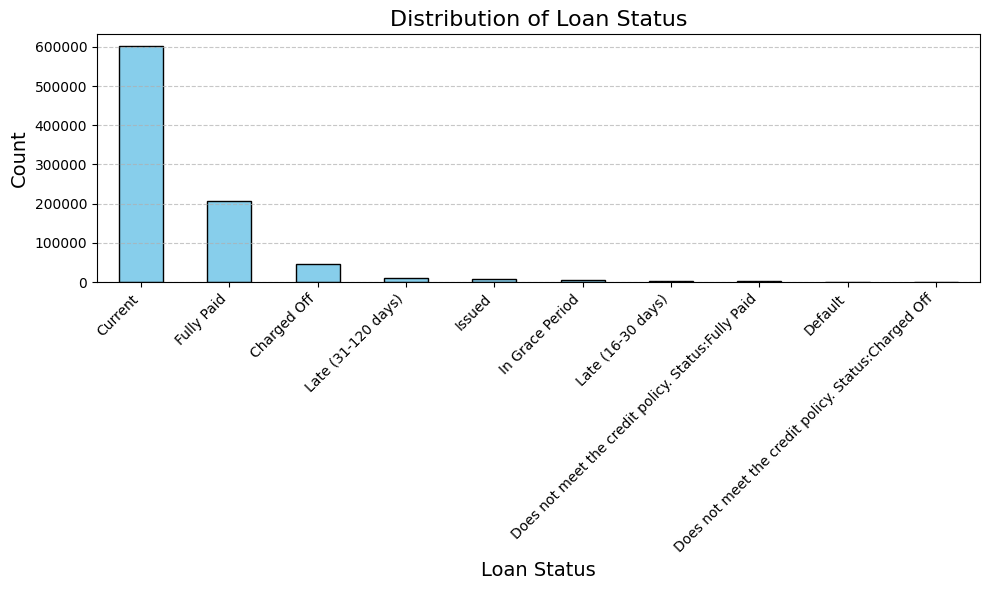

In [422]:
#Visualize the distribution of the target variable 'loan_status' using a bar plot.
import matplotlib.pyplot as plt

# Plot the distribution of the 'loan_status' variable
plt.figure(figsize=(10, 6))
df['loan_status'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Loan Status', fontsize=16)
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [423]:
# Define the mapping for loan_status
mapping = {
    'Fully Paid': 1,
    'Current': 1,
    'In Grace Period': 1,
    'Charged Off': 0,
    'Default': 0,
    'Late (16-30 days)': 0,
    'Late (31-120 days)': 0,
    'Does not meet the credit policy. Status:Fully Paid': 1,
    'Does not meet the credit policy. Status:Charged Off': 0
}

# Apply the mapping and exclude 'Issued'
df = df[df['loan_status'] != 'Issued']
df['loan_class'] = df['loan_status'].map(mapping)

C:\Users\claud\AppData\Local\Temp\ipykernel_29464\425868568.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan_class'] = df['loan_status'].map(mapping)


In [424]:
df.head(10)

,term,grade,sub_grade,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,purpose,addr_state,...,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_class
0,36 months,B,B2,10+ years,RENT,Verified,Fully Paid,n,credit_card,AZ,...,0.0,13648.0,83.7,9.0,0.0,0.0,NaN,NaN,NaN,1
1,60 months,C,C4,< 1 year,RENT,Source Verified,Charged Off,n,car,GA,...,0.0,1687.0,9.4,4.0,0.0,0.0,NaN,NaN,NaN,0
2,36 months,C,C5,10+ years,RENT,Not Verified,Fully Paid,n,small_business,IL,...,0.0,2956.0,98.5,10.0,0.0,0.0,NaN,NaN,NaN,1
3,36 months,C,C1,10+ years,RENT,Source Verified,Fully Paid,n,other,CA,...,0.0,5598.0,21.0,37.0,0.0,0.0,NaN,NaN,NaN,1
4,60 months,B,B5,1 year,RENT,Source Verified,Current,n,other,OR,...,0.0,27783.0,53.9,38.0,0.0,0.0,NaN,NaN,NaN,1
5,36 months,A,A4,3 years,RENT,Source Verified,Fully Paid,n,wedding,AZ,...,0.0,7963.0,28.3,12.0,0.0,0.0,NaN,NaN,NaN,1
6,60 months,C,C5,8 years,RENT,Not Verified,Current,n,debt_consolidation,NC,...,0.0,17726.0,85.6,11.0,0.0,0.0,NaN,NaN,NaN,1
7,36 months,E,E1,9 years,RENT,Source Verified,Fully Paid,n,car,CA,...,0.0,8221.0,87.5,4.0,0.0,0.0,NaN,NaN,NaN,1
8,60 months,F,F2,4 years,OWN,Source Verified,Charged Off,n,small_business,CA,...,0.0,5210.0,32.6,13.0,0.0,0.0,NaN,NaN,NaN,0
9,60 months,B,B5,< 1 year,RENT,Verified,Charged Off,n,other,TX,...,0.0,9279.0,36.5,3.0,0.0,0.0,NaN,NaN,NaN,0


The mapping for loan classification has been applied, and a new column `loan_class` has been created. Let me know if further processing is needed.

In [425]:
# Drop rows where 'loan_status' equals 'Issued'
df = df[df['loan_status'] != 'Issued']

In [426]:
def missing_values_dataframe(dataframe):
    summary = pd.DataFrame({
        'Column': dataframe.columns,
        'Missing Values': dataframe.isnull().sum(),
        'Missing Percentage': (dataframe.isnull().mean() * 100).round(2),
        'Unique Values': dataframe.nunique()
    }).reset_index(drop=True)
    return summary

# Generate the missing values for the dataframe 'df'
df_missing_values = missing_values_dataframe(df)
df_missing_values

,Column,Missing Values,Missing Percentage,Unique Values
0,term,0,0.00,2
1,grade,0,0.00,7
2,sub_grade,0,0.00,35
3,emp_length,44194,5.03,11
4,home_ownership,0,0.00,6
5,verification_status,0,0.00,3
6,loan_status,0,0.00,9
7,pymnt_plan,0,0.00,2
8,purpose,0,0.00,14
9,addr_state,0,0.00,51


In [427]:
import numpy as np

def numerical_summary(dataframe):
    numerical_data = dataframe.select_dtypes(include=['int64', 'float64'])
    summary = pd.DataFrame({
        'Column': numerical_data.columns,
        'Mean': numerical_data.mean(),
        'Median': numerical_data.median(),
        'Std': numerical_data.std(),
        'Min': numerical_data.min(),
        'Max': numerical_data.max(),
        'Q1': numerical_data.quantile(0.25),
        'Q3': numerical_data.quantile(0.75),
        'IQR': numerical_data.quantile(0.75) - numerical_data.quantile(0.25),
        'Skewness': numerical_data.skew(),
        'Kurtosis': numerical_data.kurtosis()
    }).reset_index(drop=True)

    # Calculate fences and outliers
    summary['Lower Fence'] = summary['Q1'] - 1.5 * summary['IQR']
    summary['Upper Fence'] = summary['Q3'] + 1.5 * summary['IQR']
    summary['N Outliers'] = numerical_data.apply(
        lambda col: ((col < (col.quantile(0.25) - 1.5 * (col.quantile(0.75) - col.quantile(0.25)))) | 
                     (col > (col.quantile(0.75) + 1.5 * (col.quantile(0.75) - col.quantile(0.25))))).sum()
    ).values

    return summary

# Generate the summary for numerical values
numerical_summary_df = numerical_summary(df)
numerical_summary_df

,Column,Mean,Median,Std,Min,Max,Q1,Q3,IQR,Skewness,Kurtosis,Lower Fence,Upper Fence,N Outliers
0,loan_amnt,14750.034872,13000.00,8430.817752,500.00,35000.00,8000.00,20000.00,12000.00,0.682371,-0.254284,-10000.000,38000.000,0
1,funded_amnt,14736.519036,13000.00,8425.194710,500.00,35000.00,8000.00,20000.00,12000.00,0.684450,-0.249150,-10000.000,38000.000,0
2,funded_amnt_inv,14696.775206,13000.00,8437.548573,0.00,35000.00,8000.00,20000.00,12000.00,0.681660,-0.249271,-10000.000,38000.000,0
3,int_rate,13.254501,12.99,4.381721,5.32,28.99,9.99,16.20,6.21,0.427578,-0.157521,0.675,25.515,6250
4,installment,436.604496,382.55,244.058028,15.67,1445.46,260.73,572.19,311.46,0.937602,0.689807,-206.460,1039.380,23022
5,annual_inc,74995.914515,64800.00,64685.490941,0.00,9500000.00,45000.00,90000.00,45000.00,44.668641,4843.428134,-22500.000,157500.000,39276
6,dti,18.144543,17.64,17.250291,0.00,9999.00,11.90,23.93,12.03,441.128004,255034.322224,-6.145,41.975,70
7,delinq_2yrs,0.314080,0.00,0.861522,0.00,39.00,0.00,0.00,0.00,5.476935,57.503271,0.000,0.000,168586
8,inq_last_6mths,0.695155,0.00,0.999225,0.00,33.00,0.00,1.00,1.00,2.111362,11.979769,-1.500,2.500,53434
9,mths_since_last_delinq,34.063793,31.00,21.884861,0.00,188.00,15.00,50.00,35.00,0.455609,-0.767029,-37.500,102.500,155


In [428]:
def categorical_summary(dataframe):
    categorical_data = dataframe.select_dtypes(include=['object'])
    summary = pd.DataFrame({
        'Column': categorical_data.columns,
        'N Unique': categorical_data.nunique().values,
        'Mode': categorical_data.mode().iloc[0].values,
        'Mode Count': categorical_data.apply(lambda col: col.value_counts().iloc[0]).values,
        'Second Most Common': categorical_data.apply(lambda col: col.value_counts().index[1] if len(col.value_counts()) > 1 else None).values,
        'Second Most Common Count': categorical_data.apply(lambda col: col.value_counts().iloc[1] if len(col.value_counts()) > 1 else None).values
    }).reset_index(drop=True)
    return summary

# Generate the summary for categorical values
categorical_summary_df = categorical_summary(df)
categorical_summary_df

,Column,N Unique,Mode,Mode Count,Second Most Common,Second Most Common Count
0,term,2,36 months,615143,60 months,263776
1,grade,7,B,252006,C,243388
2,sub_grade,35,B3,55777,B4,55095
3,emp_length,11,10+ years,288752,2 years,78167
4,home_ownership,6,MORTGAGE,439337,RENT,352915
5,verification_status,3,Source Verified,326722,Verified,288226
6,loan_status,9,Current,601779,Fully Paid,207723
7,pymnt_plan,2,n,878909,y,10
8,purpose,14,debt_consolidation,519419,credit_card,204111
9,addr_state,51,CA,128370,NY,73364


Handling Missing Values

- mths_since_last_delinq (51.23% missing).  Impute with median (since it's numerical and skewed)

In [429]:
# Impute missing values in 'mths_since_last_delinq' with the median
df['mths_since_last_delinq'].fillna(df['mths_since_last_delinq'].median(), inplace=True)

C:\Users\claud\AppData\Local\Temp\ipykernel_29464\1548337286.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mths_since_last_delinq'].fillna(df['mths_since_last_delinq'].median(), inplace=True)


- revol_util (0.06% missing), collections_12_mths_ex_med (0.02% missing), and tot_coll_amt, tot_cur_bal, total_rev_hi_lim (8% missing each).  Impute with median (due to skewed distributions).

In [ ]:
# Impute missing values for specified columns with their respective medians
columns_to_impute = ['revol_util', 'collections_12_mths_ex_med', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']
for column in columns_to_impute:
    df[column].fillna(df[column].median(), inplace=True)

In [431]:
df_missing_values = missing_values_dataframe(df)
df_missing_values

,Column,Missing Values,Missing Percentage,Unique Values
0,term,0,0.00,2
1,grade,0,0.00,7
2,sub_grade,0,0.00,35
3,emp_length,44194,5.03,11
4,home_ownership,0,0.00,6
5,verification_status,0,0.00,3
6,loan_status,0,0.00,9
7,pymnt_plan,0,0.00,2
8,purpose,0,0.00,14
9,addr_state,0,0.00,51


- annual_inc,delinq_2yrs,inq_last_6mths,open_acc,open_acc.  Impute with median for numerical columns.

In [ ]:
# Impute missing values for specified columns with their respective medians
columns_to_impute = ['annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'open_acc']
for column in columns_to_impute:
    df[column].fillna(df[column].median(), inplace=True)

Drop additional columns

Since loan_amnt, funded_amnt, and funded_amnt_inv are highly related. We will keep loan_amnt and drop the others.

In [433]:
# Drop the columns 'funded_amnt' and 'funded_amnt_inv' from the dataframe
df.drop(['funded_amnt', 'funded_amnt_inv'], axis=1, inplace=True)

In [434]:
# Update the list of numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'loan_class']

In [ ]:
# Impute missing values for specified columns with their respective medians
columns_to_impute = ['annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc', 'acc_now_delinq']
for column in columns_to_impute:
    df[column].fillna(df[column].median(), inplace=True)

- emp_length, earliest_cr_line. Impute with the mode.

In [ ]:
# Impute emp_length and earliest_cr_line with the mode
df['emp_length'].fillna(df['emp_length'].mode()[0], inplace=True)
df['earliest_cr_line'].fillna(df['earliest_cr_line'].mode()[0], inplace=True)

The missing values for 'emp_length' and 'earliest_cr_line' have been imputed with their respective modes.

In [437]:
df_missing_values = missing_values_dataframe(df)
df_missing_values

,Column,Missing Values,Missing Percentage,Unique Values
0,term,0,0.0,2
1,grade,0,0.0,7
2,sub_grade,0,0.0,35
3,emp_length,0,0.0,11
4,home_ownership,0,0.0,6
5,verification_status,0,0.0,3
6,loan_status,0,0.0,9
7,pymnt_plan,0,0.0,2
8,purpose,0,0.0,14
9,addr_state,0,0.0,51


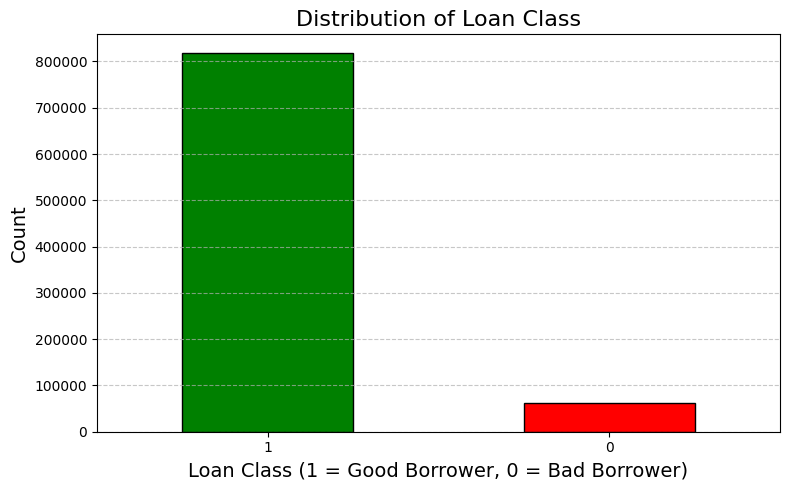

In [438]:
# Generate a visualization of the distribution for the variable 'loan_class'
plt.figure(figsize=(8, 5))
df['loan_class'].value_counts().plot(kind='bar', color=['green', 'red'], edgecolor='black')
plt.title('Distribution of Loan Class', fontsize=16)
plt.xlabel('Loan Class (1 = Good Borrower, 0 = Bad Borrower)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The distribution of the loan_class variable shows a noticeable class imbalance.

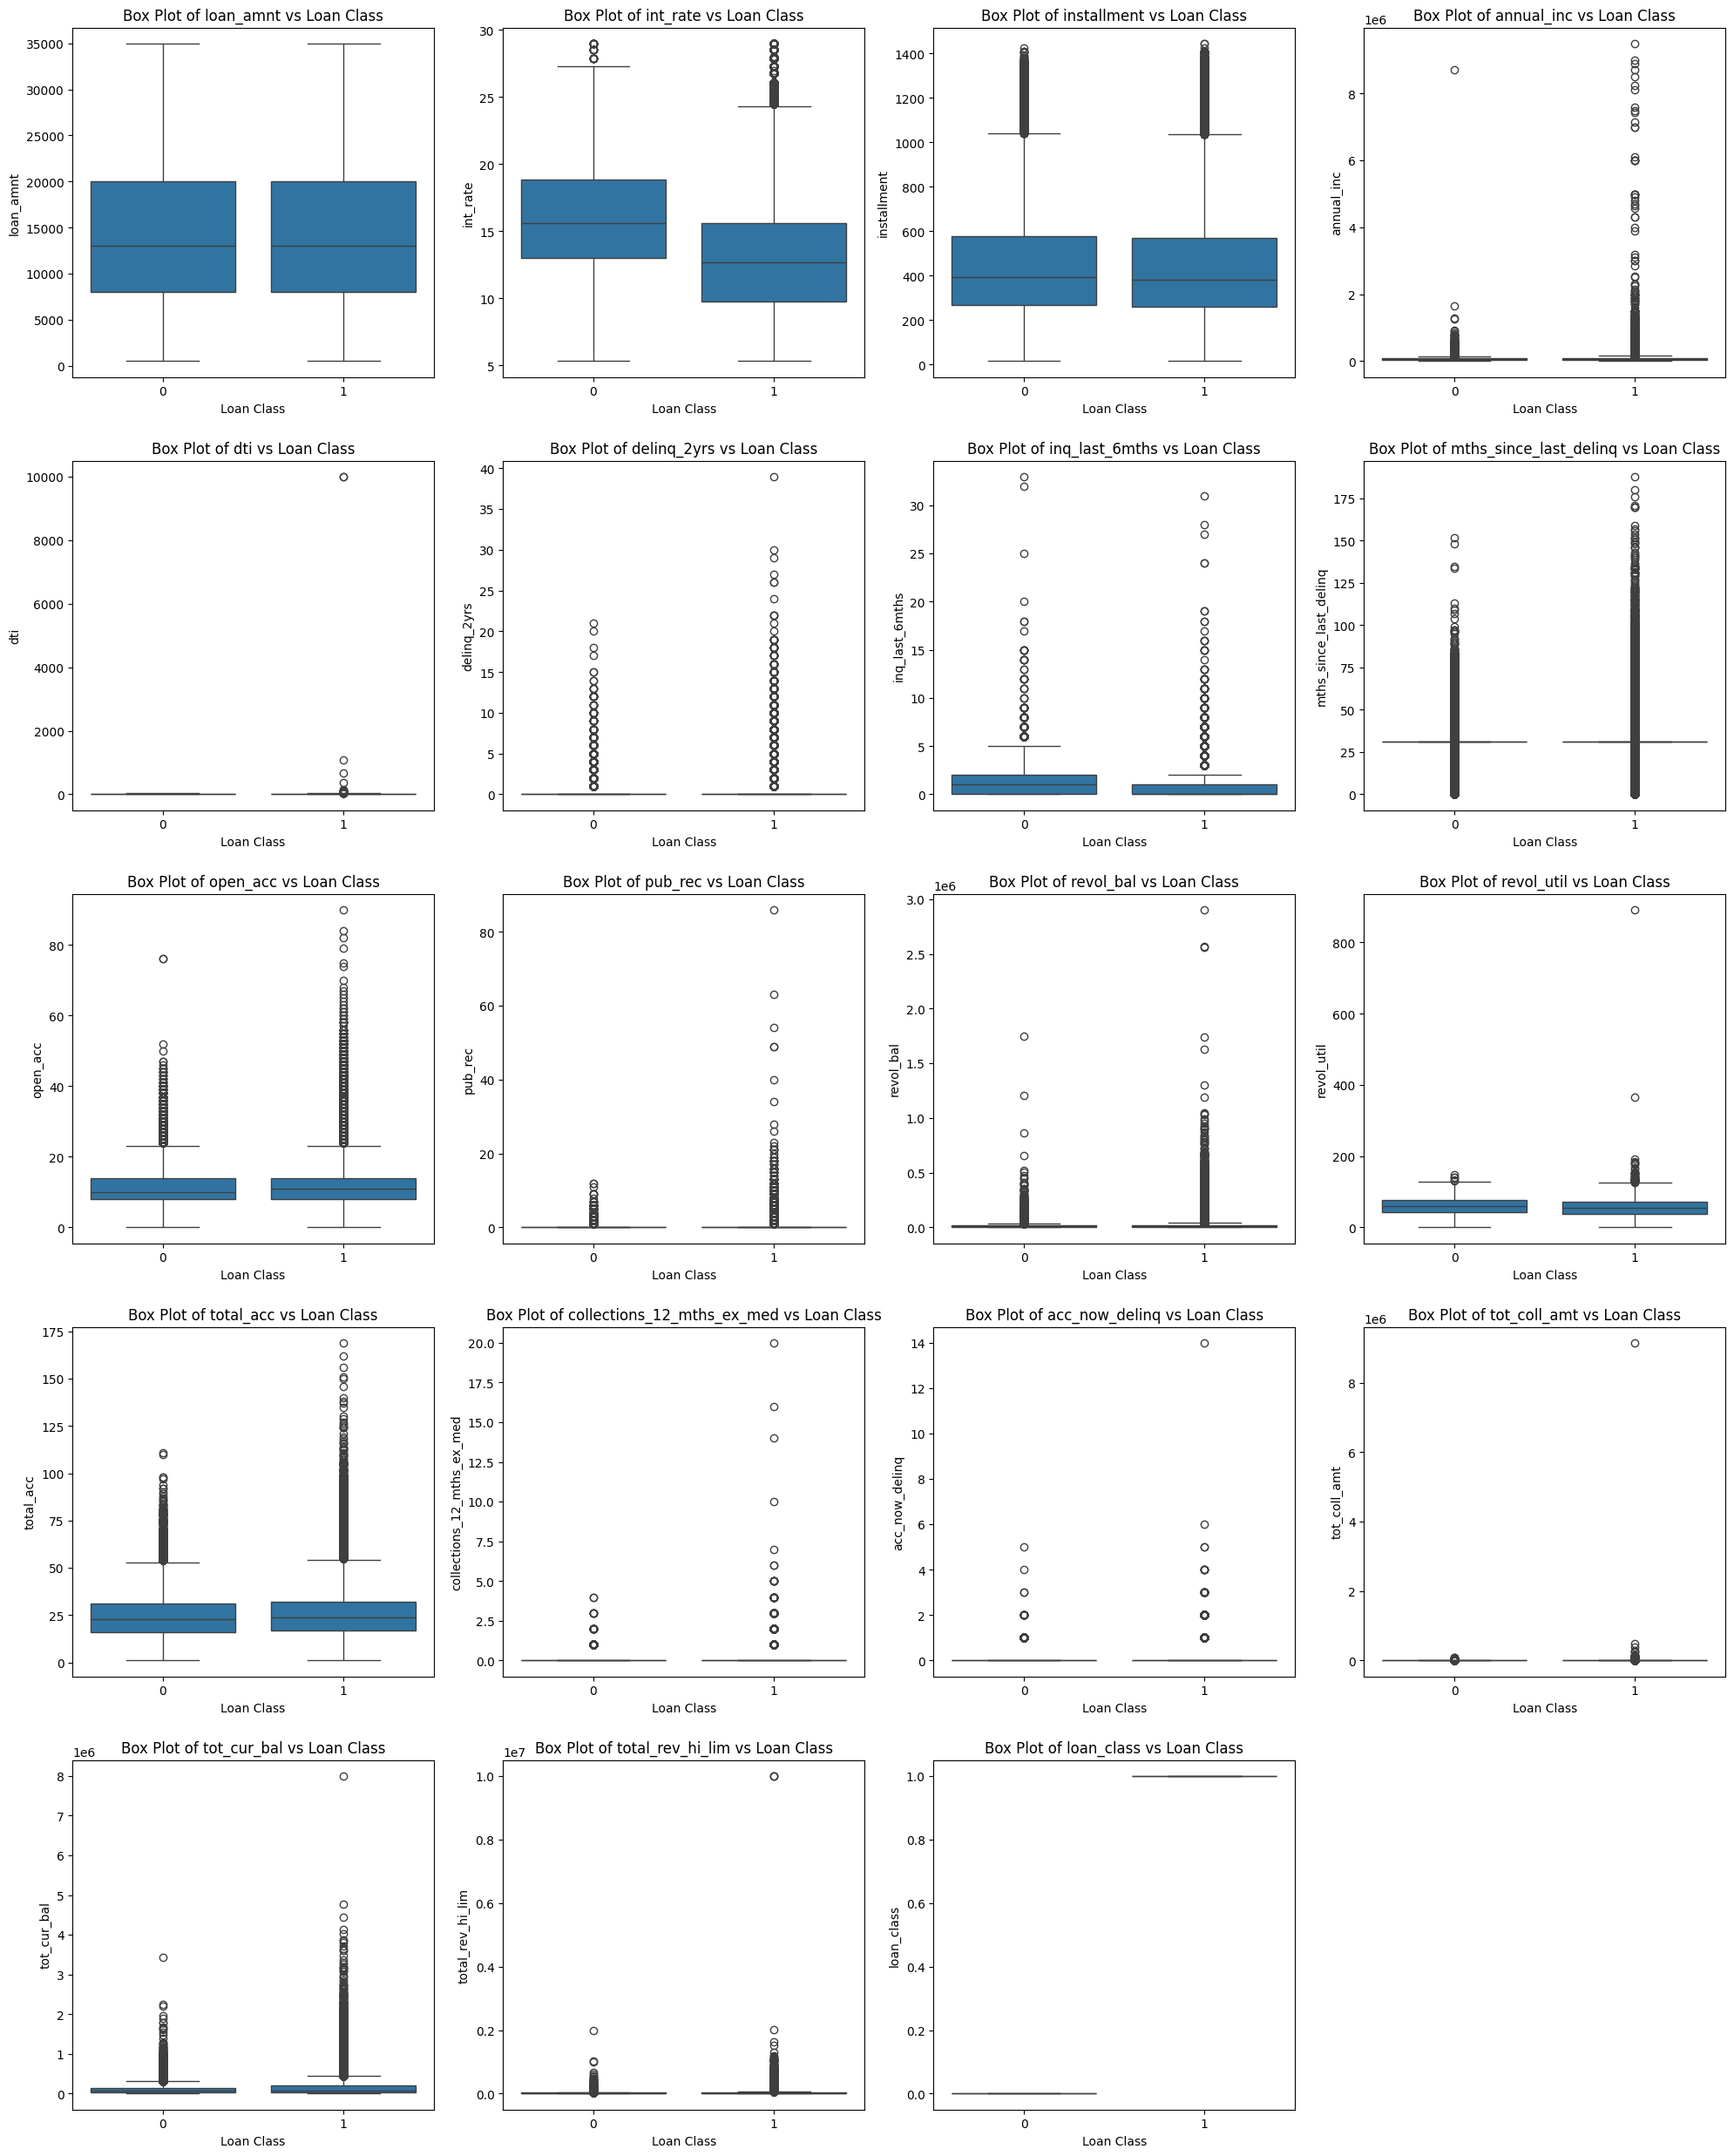

In [439]:
#box plots for numerical features against 'loan_class'
import seaborn as sns

# Set up the grid for box plots
num_cols = 4
num_rows = -(-len(numerical_columns) // num_cols)  # Calculate the number of rows needed
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
axes = axes.flatten()

# Plot each numerical feature against 'loan_class'
for i, column in enumerate(numerical_columns):
    sns.boxplot(data=df, x='loan_class', y=column, ax=axes[i])
    axes[i].set_title(f'Box Plot of {column} vs Loan Class', fontsize=12)
    axes[i].set_xlabel('Loan Class')
    axes[i].set_ylabel(column)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The box plots for numerical features against 'loan_class' have been displayed in a grid layout with 4 columns.

In [440]:
# Analyze the boxplot results for numerical variables against 'loan_class'
analysis = []

for column in numerical_columns:
    good_borrowers = df[df['loan_class'] == 1][column]
    bad_borrowers = df[df['loan_class'] == 0][column]

    analysis.append({
        'Column': column,
        'Good Borrowers Median': good_borrowers.median(),
        'Bad Borrowers Median': bad_borrowers.median(),
        'Good Borrowers IQR': good_borrowers.quantile(0.75) - good_borrowers.quantile(0.25),
        'Bad Borrowers IQR': bad_borrowers.quantile(0.75) - bad_borrowers.quantile(0.25),
        'Good Borrowers Mean': good_borrowers.mean(),
        'Bad Borrowers Mean': bad_borrowers.mean()
    })

analysis_df = pd.DataFrame(analysis)
analysis_df

,Column,Good Borrowers Median,Bad Borrowers Median,Good Borrowers IQR,Bad Borrowers IQR,Good Borrowers Mean,Bad Borrowers Mean
0,loan_amnt,13000.00,13000.00,12000.00,12000.0000,14750.687716,14741.308274
1,int_rate,12.69,15.61,5.85,5.8500,13.050129,15.986362
2,installment,382.17,393.42,311.21,309.1575,435.940741,445.476950
3,annual_inc,65000.00,57400.00,44000.00,39000.0000,75637.101267,66424.468833
4,dti,17.57,18.57,12.04,11.7300,18.104278,18.682776
5,delinq_2yrs,0.00,0.00,0.00,0.0000,0.314558,0.307539
6,inq_last_6mths,0.00,1.00,1.00,2.0000,0.672610,0.996191
7,mths_since_last_delinq,31.00,31.00,0.00,0.0000,32.516321,32.197381
8,open_acc,11.00,10.00,6.00,6.0000,11.567770,11.201092
9,pub_rec,0.00,0.00,0.00,0.0000,0.197154,0.162874


The analysis of the boxplot results reveals the following insights:

1. **Loan Amount (`loan_amnt`)**: The median loan amount is similar for both good and bad borrowers, indicating no significant difference in loan size between the two groups.

2. **Interest Rate (`int_rate`)**: Bad borrowers tend to have higher interest rates (median: 15.61%) compared to good borrowers (median: 12.69%), suggesting that higher interest rates may correlate with higher credit risk.

3. **Installment (`installment`)**: The median installment amount is slightly higher for bad borrowers, which could indicate a higher repayment burden.

4. **Annual Income (`annual_inc`)**: Good borrowers have a higher median annual income (65,000) compared to bad borrowers (57,400), suggesting that income level may influence creditworthiness.

5. **Debt-to-Income Ratio (`dti`)**: Bad borrowers have a slightly higher median DTI, indicating that they may have a higher debt burden relative to their income.

6. **Delinquencies (`delinq_2yrs`)**: Both groups have a median of 0, but the mean is slightly higher for bad borrowers, indicating a higher frequency of delinquencies.

7. **Revolving Utilization (`revol_util`)**: Bad borrowers tend to have slightly higher utilization rates, indicating they may rely more heavily on credit.

8. **Total Current Balance (`tot_cur_bal`)**: Good borrowers have a higher median total current balance, suggesting better financial stability.

9. **Total Revolving High Credit Limit (`total_rev_hi_lim`)**: Good borrowers have a higher median credit limit, which may reflect better creditworthiness.

These insights suggest that factors like interest rate, income, DTI, and credit utilization are key differentiators between good and bad borrowers. 

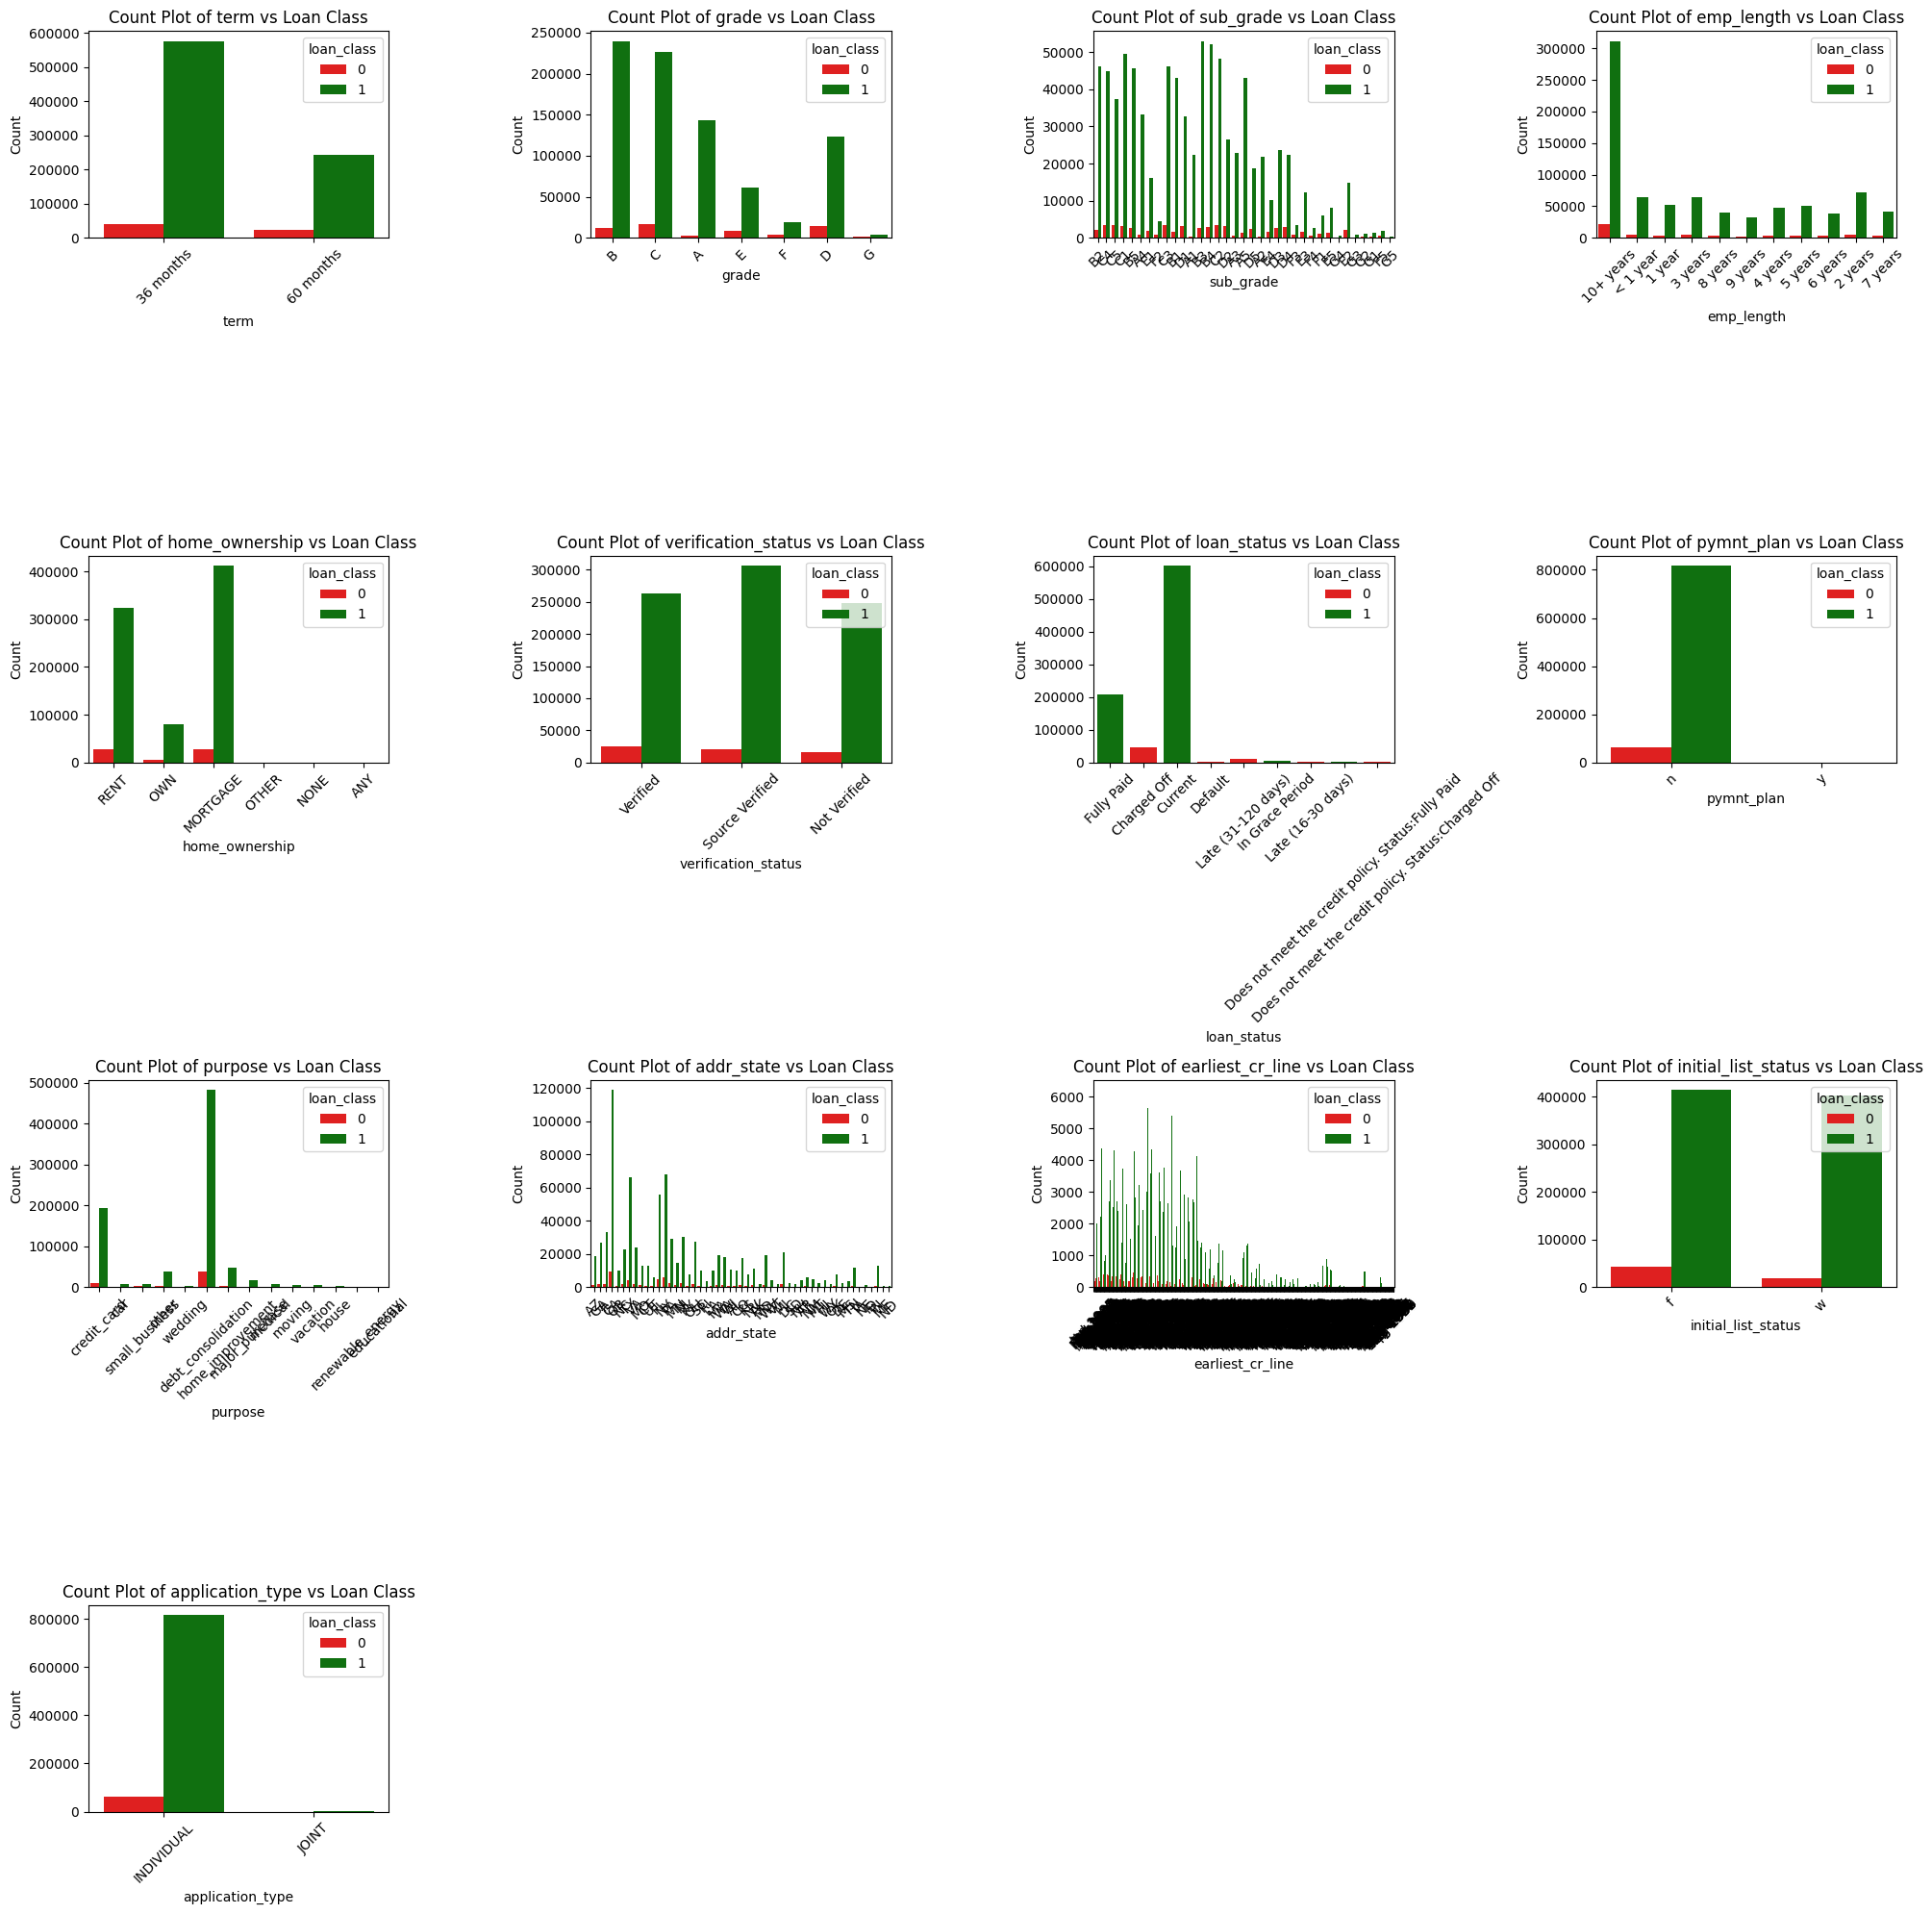

In [441]:
#Plot box plots of categorical features against 'loan_class'
import seaborn as sns

# Set up the grid for box plots
num_plots = len(categorical_columns)
num_cols = 4
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    sns.countplot(data=df, x=column, hue='loan_class', ax=axes[i], palette=['red', 'green'])
    axes[i].set_title(f'Count Plot of {column} vs Loan Class', fontsize=12)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [442]:
# Analyze the count plot results for categorical variables against 'loan_class'
categorical_analysis = []

for column in categorical_columns:
    good_borrowers = df[df['loan_class'] == 1][column].value_counts(normalize=True)
    bad_borrowers = df[df['loan_class'] == 0][column].value_counts(normalize=True)

    analysis = {
        'Column': column,
        'Good Borrowers Mode': good_borrowers.idxmax(),
        'Good Borrowers Mode Percentage': good_borrowers.max() * 100,
        'Bad Borrowers Mode': bad_borrowers.idxmax(),
        'Bad Borrowers Mode Percentage': bad_borrowers.max() * 100
    }

    categorical_analysis.append(analysis)

categorical_analysis_df = pd.DataFrame(categorical_analysis)
categorical_analysis_df

,Column,Good Borrowers Mode,Good Borrowers Mode Percentage,Bad Borrowers Mode,Bad Borrowers Mode Percentage
0,term,36 months,70.460646,36 months,63.678567
1,grade,B,29.323394,C,28.061658
2,sub_grade,B3,6.480887,C4,5.783314
3,emp_length,10+ years,38.104514,10+ years,34.897672
4,home_ownership,MORTGAGE,50.442865,RENT,46.799398
5,verification_status,Source Verified,37.506527,Verified,41.143586
6,loan_status,Current,73.590236,Charged Off,73.963646
7,pymnt_plan,n,99.999389,n,99.991827
8,purpose,debt_consolidation,58.919367,debt_consolidation,61.478358
9,addr_state,CA,14.522656,CA,15.712044


The analysis of categorical variables against `loan_class` reveals the following:

1. **Term**: Good borrowers are more likely to have loans with a term of 36 months (70.46%), while bad borrowers also favor 36 months but at a slightly lower percentage (63.68%).

2. **Grade**: Grade B is the most common for good borrowers (29.32%), while Grade C is the most common for bad borrowers (28.06%).

3. **Sub-Grade**: Sub-grade B3 is the most frequent for good borrowers (6.48%), while C4 is the most frequent for bad borrowers (5.78%).

4. **Employment Length**: Borrowers with 10+ years of employment are the most common in both groups, but the percentage is higher for good borrowers (38.10%) compared to bad borrowers (34.89%).

5. **Home Ownership**: Good borrowers are more likely to have a mortgage (50.44%), while bad borrowers are more likely to rent (46.80%).

6. **Verification Status**: Source Verified is the most common for good borrowers (37.51%), while Verified is more common for bad borrowers (41.14%).

7. **Loan Status**: Good borrowers are predominantly in the Current status (73.59%), while bad borrowers are mostly Charged Off (73.96%).

8. **Purpose**: Debt consolidation is the most common purpose for both groups, but it is more prevalent among bad borrowers (61.48%) compared to good borrowers (50.44%).

9. **State**: California (CA) is the most common state for both groups, but the percentage is higher for good borrowers (14.47%) compared to bad borrowers (15.71%).

10. **Initial List Status**: Status 'f' is the most common for both groups, with a higher percentage among good borrowers (68.43%).

11. **Application Type**: Individual applications dominate for both groups, with nearly 100% in both cases.

These insights highlight key differences in categorical features between good and bad borrowers, such as loan term, grade, employment length, and home ownership.

Handling Outliers

Severe Outliers Found in:
- annual_inc (mean: $75k, max: $9.5M, skew: 44.67) – Cap outliers at the 99th percentile.
- dti (max: 9999, skew: 441.13) – Cap at the 99th percentile.
- revol_bal, tot_coll_amt, and tot_cur_bal also have extreme outliers – Cap at the 99th percentile.

In [443]:
# Cap outliers in the 'annual_inc' column at the 99th percentile
percentile_99 = df['annual_inc'].quantile(0.99)
df['annual_inc'] = df['annual_inc'].clip(upper=percentile_99)

In [444]:
# Cap outliers in the 'dti' column at the 99th percentile
percentile_99 = df['dti'].quantile(0.99)
df['dti'] = df['dti'].clip(upper=percentile_99)

In [445]:
percentile_99_revol_bal = df['revol_bal'].quantile(0.99)
df['revol_bal'] = df['revol_bal'].clip(upper=percentile_99_revol_bal)

In [446]:
percentile_99_tot_coll_amt = df['tot_coll_amt'].quantile(0.99)
df['tot_coll_amt'] = df['tot_coll_amt'].clip(upper=percentile_99_tot_coll_amt)

In [447]:
percentile_99_tot_cur_bal = df['tot_cur_bal'].quantile(0.99)
df['tot_cur_bal'] = df['tot_cur_bal'].clip(upper=percentile_99_tot_cur_bal)

In [448]:
categorical_summary_df = categorical_summary(df)
categorical_summary_df

,Column,N Unique,Mode,Mode Count,Second Most Common,Second Most Common Count
0,term,2,36 months,615143,60 months,263776
1,grade,7,B,252006,C,243388
2,sub_grade,35,B3,55777,B4,55095
3,emp_length,11,10+ years,332946,2 years,78167
4,home_ownership,6,MORTGAGE,439337,RENT,352915
5,verification_status,3,Source Verified,326722,Verified,288226
6,loan_status,9,Current,601779,Fully Paid,207723
7,pymnt_plan,2,n,878909,y,10
8,purpose,14,debt_consolidation,519419,credit_card,204111
9,addr_state,51,CA,128370,NY,73364


The column pymnt_plan will be deleted.  It has Low Variance, most of the data has pymnt_plan = 'n' (878,909 entries) and only 10 entries with pymnt_plan = 'y'. This kind of imbalance offers almost no predictive power to the model.


In [449]:
# Drop the column 'pymnt_plan' from the dataframe 'df'
df.drop('pymnt_plan', axis=1, inplace=True)

In [450]:
# Update the list of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'application_type']

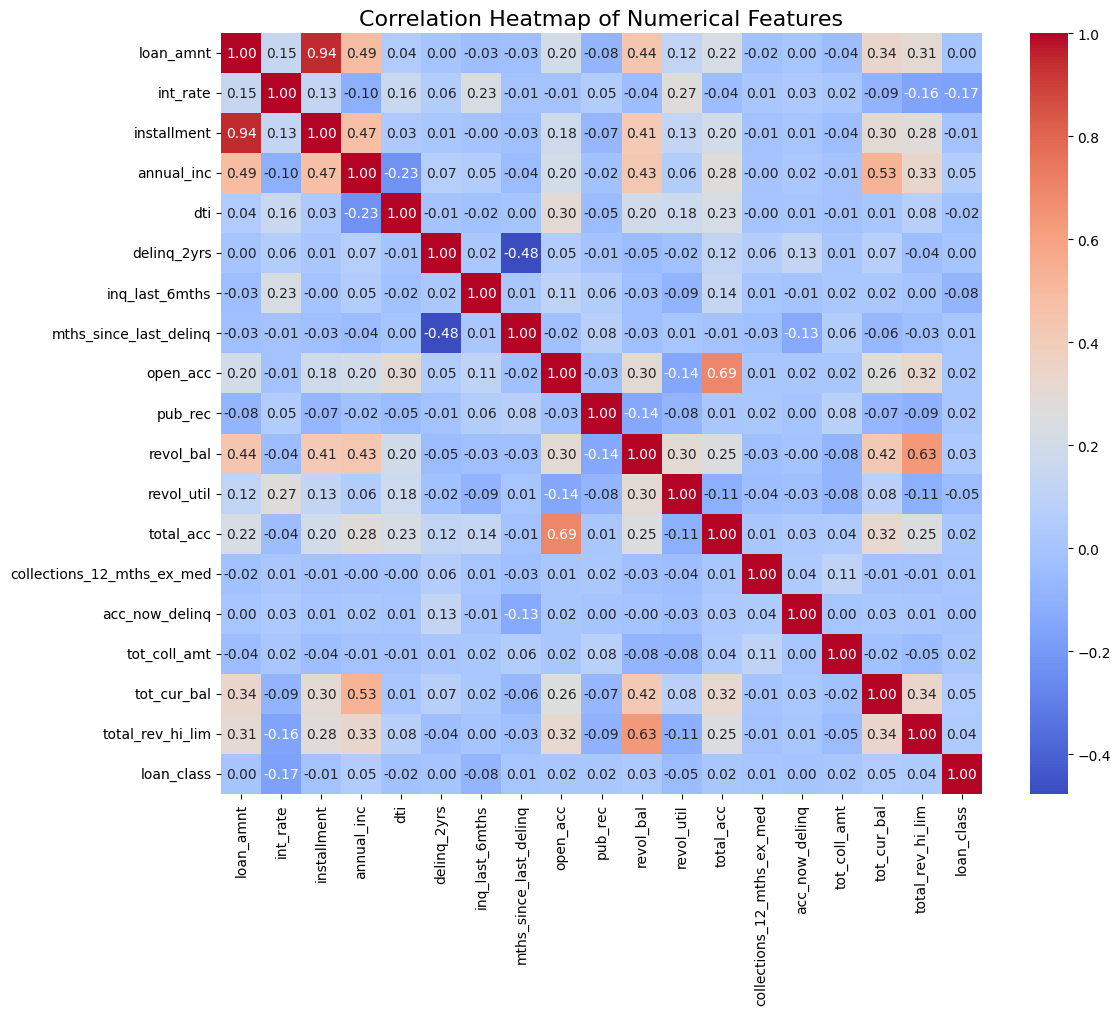

In [451]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a correlation matrix for numerical features
correlation_matrix = df[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

The correlation heatmap for numerical features has been generated, visualizing the relationships between them.

In [452]:
# Analyze the correlation matrix for significant relationships
correlation_analysis = correlation_matrix.unstack().sort_values(ascending=False)

# Filter for correlations above 0.7 (strong positive correlation) and below -0.7 (strong negative correlation)
strong_correlations = correlation_analysis[(correlation_analysis > 0.7) & (correlation_analysis < 1) | (correlation_analysis < -0.7)]
strong_correlations

loan_amnt    installment    0.94496
installment  loan_amnt      0.94496
dtype: float64

The correlation matrix reveals a strong positive correlation (0.94) between `installment` and `loan_amnt`. This indicates that as the loan amount increases, the installment amount also increases, which is expected since installments are directly tied to the loan size. No other strong correlations (above 0.7 or below -0.7) were found among the numerical features.

Categorical Encoding - Label Encoding

- term (2 unique values):
'36 months' → 0, '60 months' → 1


In [453]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [454]:
df['term'] = df['term'].str.strip().map({'36 months': 0, '60 months': 1})

In [455]:
df['term'].unique()

array([0, 1], dtype=int64)

- initial_list_status (2 unique values):
'f' → 0, 'w' → 1

In [456]:
df['initial_list_status'].unique()

array(['f', 'w'], dtype=object)

In [457]:
# Encode the 'initial_list_status' column using label encoding
df['initial_list_status'] = df['initial_list_status'].map({'f': 0, 'w': 1})

- application_type (2 unique values):
'INDIVIDUAL' → 0, 'JOINT' → 1

In [458]:
df['application_type'].unique()

array(['INDIVIDUAL', 'JOINT'], dtype=object)

In [459]:
# Encode the 'application_type' column using label encoding
df['application_type'] = df['application_type'].map({'INDIVIDUAL': 0, 'JOINT': 1})

emp_length (11 unique values):
Convert this ordinal feature to numerical labels:
< 1 year → 0,
1 year → 1,
2 years → 2,
...,
10+ years → 10

In [460]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [461]:
# Encode the 'emp_length' column using label encoding
emp_length_mapping = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}
df['emp_length'] = df['emp_length'].map(emp_length_mapping)

- sub_grade (35 unique values): This is an ordinal variable (A1 < A2 < B1 < B2, etc.), so label encode it to retain the order. 

In [462]:
df['sub_grade'].unique()

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

In [463]:
# Encode the 'sub_grade' column using label encoding
sub_grade_mapping = {grade + str(i): idx for idx, (grade, i) in enumerate([(g, n) for g in 'ABCDEFG' for n in range(1, 6)])}
df['sub_grade'] = df['sub_grade'].map(sub_grade_mapping)

In [464]:
df.head(3)

,term,grade,sub_grade,emp_length,home_ownership,verification_status,loan_status,purpose,addr_state,earliest_cr_line,...,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_class
0,0,B,6,10,RENT,Verified,Fully Paid,credit_card,AZ,Jan-1985,...,0.0,13648.0,83.7,9.0,0.0,0.0,0.0,80499.0,23700.0,1
1,1,C,13,0,RENT,Source Verified,Charged Off,car,GA,Apr-1999,...,0.0,1687.0,9.4,4.0,0.0,0.0,0.0,80499.0,23700.0,0
2,0,C,14,10,RENT,Not Verified,Fully Paid,small_business,IL,Nov-2001,...,0.0,2956.0,98.5,10.0,0.0,0.0,0.0,80499.0,23700.0,1


Categorical Encoding - One-Hot Encoding 

- grade (7 unique values: A, B, C, D, E, F, G)

- home_ownership (6 unique values: MORTGAGE, RENT, OWN, etc.)

- verification_status (3 unique values: Verified, Source Verified, Not Verified)

- purpose (14 unique values: debt_consolidation, credit_card, home_improvement, etc.)

In [465]:
print(df['grade'].unique())
print(df['home_ownership'].unique())
print(df['verification_status'].unique())
print(df['purpose'].unique())

['B' 'C' 'A' 'E' 'F' 'D' 'G']
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
['Verified' 'Source Verified' 'Not Verified']
['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']


In [466]:
# Perform one-hot encoding for the specified columns
df = pd.get_dummies(df, columns=['grade', 'home_ownership', 'verification_status', 'purpose'], drop_first=True)

In [467]:
df.head(3)

,term,sub_grade,emp_length,loan_status,addr_state,earliest_cr_line,initial_list_status,application_type,loan_amnt,int_rate,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,0,6,10,Fully Paid,AZ,Jan-1985,0,0,5000.0,10.65,...,False,False,False,False,False,False,False,False,False,False
1,1,13,0,Charged Off,GA,Apr-1999,0,0,2500.0,15.27,...,False,False,False,False,False,False,False,False,False,False
2,0,14,10,Fully Paid,IL,Nov-2001,0,0,2400.0,15.96,...,False,False,False,False,False,False,False,True,False,False


In [468]:
df['addr_state'].unique()

array(['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT',
       'FL', 'NY', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME', 'ND'], dtype=object)

In [469]:
# Define a mapping of states to regions
state_to_region = {
    'CT': 'Northeast', 'ME': 'Northeast', 'MA': 'Northeast', 'NH': 'Northeast', 'RI': 'Northeast', 'VT': 'Northeast',
    'NJ': 'Northeast', 'NY': 'Northeast', 'PA': 'Northeast',
    'IL': 'Midwest', 'IN': 'Midwest', 'MI': 'Midwest', 'OH': 'Midwest', 'WI': 'Midwest',
    'IA': 'Midwest', 'KS': 'Midwest', 'MN': 'Midwest', 'MO': 'Midwest', 'NE': 'Midwest', 'ND': 'Midwest', 'SD': 'Midwest',
    'AL': 'South', 'AR': 'South', 'DE': 'South', 'FL': 'South', 'GA': 'South', 'KY': 'South', 'LA': 'South', 'MD': 'South',
    'MS': 'South', 'NC': 'South', 'OK': 'South', 'SC': 'South', 'TN': 'South', 'TX': 'South', 'VA': 'South', 'WV': 'South',
    'AK': 'West', 'AZ': 'West', 'CA': 'West', 'CO': 'West', 'HI': 'West', 'ID': 'West', 'MT': 'West', 'NV': 'West',
    'NM': 'West', 'OR': 'West', 'UT': 'West', 'WA': 'West', 'WY': 'West', 'DC':'South'
}

# Map the 'addr_state' column to regions
df['region'] = df['addr_state'].map(state_to_region)

The states in the 'addr_state' column have been grouped into regions and stored in a new column called 'region'.

The rows with missing values in the `region` column correspond to the `addr_state` value "DC".

In [470]:
df['region'].unique()

array(['West', 'South', 'Midwest', 'Northeast'], dtype=object)

In [471]:
df_missing_values = missing_values_dataframe(df)
df_missing_values

,Column,Missing Values,Missing Percentage,Unique Values
0,term,0,0.0,2
1,sub_grade,0,0.0,35
2,emp_length,0,0.0,11
3,loan_status,0,0.0,9
4,addr_state,0,0.0,51
5,earliest_cr_line,0,0.0,697
6,initial_list_status,0,0.0,2
7,application_type,0,0.0,2
8,loan_amnt,0,0.0,1372
9,int_rate,0,0.0,541


In [472]:
df.head(15)

,term,sub_grade,emp_length,loan_status,addr_state,earliest_cr_line,initial_list_status,application_type,loan_amnt,int_rate,...,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,region
0,0,6,10,Fully Paid,AZ,Jan-1985,0,0,5000.0,10.65,...,False,False,False,False,False,False,False,False,False,West
1,1,13,0,Charged Off,GA,Apr-1999,0,0,2500.0,15.27,...,False,False,False,False,False,False,False,False,False,South
2,0,14,10,Fully Paid,IL,Nov-2001,0,0,2400.0,15.96,...,False,False,False,False,False,False,True,False,False,Midwest
3,0,10,10,Fully Paid,CA,Feb-1996,0,0,10000.0,13.49,...,False,False,False,False,True,False,False,False,False,West
4,1,9,1,Current,OR,Jan-1996,0,0,3000.0,12.69,...,False,False,False,False,True,False,False,False,False,West
5,0,3,3,Fully Paid,AZ,Nov-2004,0,0,5000.0,7.90,...,False,False,False,False,False,False,False,False,True,West
6,1,14,8,Current,NC,Jul-2005,0,0,7000.0,15.96,...,False,False,False,False,False,False,False,False,False,South
7,0,20,9,Fully Paid,CA,Jan-2007,0,0,3000.0,18.64,...,False,False,False,False,False,False,False,False,False,West
8,1,26,4,Charged Off,CA,Apr-2004,0,0,5600.0,21.28,...,False,False,False,False,False,False,True,False,False,West
9,1,9,0,Charged Off,TX,Sep-2004,0,0,5375.0,12.69,...,False,False,False,False,True,False,False,False,False,South


In [473]:
# Perform one-hot encoding for the 'region' column
df = pd.get_dummies(df, columns=['region'], drop_first=True)

Feature Engineering

- earliest_cr_line is a date field. Instead of encoding it directly, create a new numerical feature:
credit_history_length = Current Year - Year from earliest_cr_line.


In [474]:
from datetime import datetime

# Extract the year from 'earliest_cr_line' and calculate 'credit_history_length'
current_year = datetime.now().year
df['credit_history_length'] = current_year - pd.to_datetime(df['earliest_cr_line'], format='%b-%Y').dt.year

In [475]:
df.head(3)

,term,sub_grade,emp_length,loan_status,addr_state,earliest_cr_line,initial_list_status,application_type,loan_amnt,int_rate,...,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,region_Northeast,region_South,region_West,credit_history_length
0,0,6,10,Fully Paid,AZ,Jan-1985,0,0,5000.0,10.65,...,False,False,False,False,False,False,False,False,True,40
1,1,13,0,Charged Off,GA,Apr-1999,0,0,2500.0,15.27,...,False,False,False,False,False,False,False,True,False,26
2,0,14,10,Fully Paid,IL,Nov-2001,0,0,2400.0,15.96,...,False,False,False,True,False,False,False,False,False,24


In [476]:
# Drop the original 'addr_state' and 'earliest_cr_line' columns
df.drop('earliest_cr_line', axis=1, inplace=True)
df.drop('addr_state', axis=1, inplace=True)

In [477]:
df.head(3)

,term,sub_grade,emp_length,loan_status,initial_list_status,application_type,loan_amnt,int_rate,installment,annual_inc,...,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,region_Northeast,region_South,region_West,credit_history_length
0,0,6,10,Fully Paid,0,0,5000.0,10.65,162.87,24000.0,...,False,False,False,False,False,False,False,False,True,40
1,1,13,0,Charged Off,0,0,2500.0,15.27,59.83,30000.0,...,False,False,False,False,False,False,False,True,False,26
2,0,14,10,Fully Paid,0,0,2400.0,15.96,84.33,12252.0,...,False,False,False,True,False,False,False,False,False,24


In [478]:
df_missing_values = missing_values_dataframe(df)
df_missing_values

,Column,Missing Values,Missing Percentage,Unique Values
0,term,0,0.0,2
1,sub_grade,0,0.0,35
2,emp_length,0,0.0,11
3,loan_status,0,0.0,9
4,initial_list_status,0,0.0,2
5,application_type,0,0.0,2
6,loan_amnt,0,0.0,1372
7,int_rate,0,0.0,541
8,installment,0,0.0,68291
9,annual_inc,0,0.0,48300


In [479]:
# Get categorical columns except 'loan_status'
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns.tolist()
categorical_columns.remove('loan_status')
categorical_columns

['grade_B',
 'grade_C',
 'grade_D',
 'grade_E',
 'grade_F',
 'grade_G',
 'home_ownership_MORTGAGE',
 'home_ownership_NONE',
 'home_ownership_OTHER',
 'home_ownership_OWN',
 'home_ownership_RENT',
 'verification_status_Source Verified',
 'verification_status_Verified',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_educational',
 'purpose_home_improvement',
 'purpose_house',
 'purpose_major_purchase',
 'purpose_medical',
 'purpose_moving',
 'purpose_other',
 'purpose_renewable_energy',
 'purpose_small_business',
 'purpose_vacation',
 'purpose_wedding',
 'region_Northeast',
 'region_South',
 'region_West']

In [480]:
# Get numerical columns except 'loan_class'
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.remove('loan_class')
numerical_columns

['term',
 'sub_grade',
 'emp_length',
 'initial_list_status',
 'application_type',
 'loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

The lists `categorical_columns` and `numerical_columns` have been updated with the categorical and numerical values of the dataframe `df`.

Feature Scaling

In [481]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [482]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['loan_class', 'loan_status'])
y = df['loan_class']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building and Evaluation

The algorithms to be consider are:

1. Logistic Regression
2. Random Forest
4. XGBoost
5. LightGBM
6. CatBoost

To evaluate the models the metrics to use are:

- Accuracy
- Precision
- Recall
- F1 Score
- ROC-AUC

In [483]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42)
}

# Initialize results dictionary
results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    test_accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    classification_rep = classification_report(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    evaluation_results = {
    'Model': name,
    'Test Accuracy': test_accuracy,
    'ROC-AUC': roc_auc,
    'Classification Report': classification_rep
    }

    print(evaluation_results)   
 
    results.append({
        'Model': name,
        'Accuracy': test_accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC-ROC': roc_auc
    })

# Convert results to DataFrame
import pandas as pd
results_df = pd.DataFrame(results)
results_df

{'Model': 'Logistic Regression', 'Test Accuracy': 0.9297262549492559, 'ROC-AUC': 0.7327534664901219, 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.23      0.00      0.00     12346\n           1       0.93      1.00      0.96    163438\n\n    accuracy                           0.93    175784\n   macro avg       0.58      0.50      0.48    175784\nweighted avg       0.88      0.93      0.90    175784\n'}
{'Model': 'Random Forest', 'Test Accuracy': 0.9297831429481637, 'ROC-AUC': 0.7395646158665433, 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.60      0.00      0.00     12346\n           1       0.93      1.00      0.96    163438\n\n    accuracy                           0.93    175784\n   macro avg       0.76      0.50      0.48    175784\nweighted avg       0.91      0.93      0.90    175784\n'}


c:\Claudia\Projects\AI\AI_CreditRisk\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:38:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


{'Model': 'XGBoost', 'Test Accuracy': 0.929572657352205, 'ROC-AUC': 0.7748170427272509, 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.37      0.00      0.01     12346\n           1       0.93      1.00      0.96    163438\n\n    accuracy                           0.93    175784\n   macro avg       0.65      0.50      0.49    175784\nweighted avg       0.89      0.93      0.90    175784\n'}
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 654305, number of negative: 48830
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.062556 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3043
[LightGBM] [Info] Number of data points in the train set: 703135, number of used features: 53
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.930554 -> initscore=2.595229
[LightGBM] [Info] Start trai

,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,Logistic Regression,0.929726,0.929778,0.999939,0.963583,0.732753
1,Random Forest,0.929783,0.929811,0.999963,0.963612,0.739565
2,XGBoost,0.929573,0.929987,0.999498,0.963491,0.774817
3,LightGBM,0.929766,0.929791,0.999969,0.963604,0.773924
4,CatBoost,0.929453,0.930190,0.999107,0.963417,0.776927


Observations:
- Accuracy (~92.9%) is very high across all models, which is good.
- Precision (~92.9-93.0%) is also consistently high, meaning that when your model predicts a bad borrower, it is often correct.
- Recall (~99.9%) is almost perfect, indicating that the models are catching almost all bad borrowers.
- F1-Score (~0.9635-0.9636) is balanced, combining both precision and recall well.
- AUC-ROC is the metric to watch here, as it measures the model’s ability to distinguish between classes:
  CatBoost (0.7769) and XGBoost (0.7748) have the highest AUC-ROC, suggesting they are better at ranking borrowers by risk compared to others.

Potential Issues/Red Flags:
Recall being almost perfect (0.9999) for most models might indicate some level of overfitting.
Accuracy this high in credit risk models is often suspicious due to the complexity and noise in real-world financial data.
Severe Class Imbalance. Models are heavily biased towards predicting the majority class (good borrowers)
This can lead to inflated accuracy and recall, but may not perform well in real-world scenarios.

Next Steps.
- Apply SMOTE to the training data an reevalute the model with this data.

In [ ]:
# Apply SMOTE to balance the training data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Print class distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_train_balanced).value_counts(normalize=True))

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False),
    'LightGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=False)
}

# Store results
results_balanced = []

# Train and evaluate each model with balanced data
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train model
    model.fit(X_train_balanced, y_train_balanced)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    test_accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    
    print(f"Classification Report for {name}:")
    print(classification_rep)
    
    results_balanced.append({
        'Model': name,
        'Accuracy': test_accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC-ROC': roc_auc
    })

# Convert results to DataFrame
results_balanced_df = pd.DataFrame(results_balanced)
print("\nResults after SMOTE balancing:")
print(results_balanced_df)

# Compare results before and after SMOTE
comparison = pd.concat([
    results_df.set_index('Model'),
    results_balanced_df.set_index('Model')
], 
    keys=['Before SMOTE', 'After SMOTE'],
    axis=0
)

print("\nComparison of results before and after SMOTE:")
print(comparison)


Even though SMOTE successfully balances the class distribution, it does not always improve model performance.

The synthetic samples do not add new information – they are just interpolations of existing minority class points.
Models may still learn a bias toward the majority class (Class 1: good borrowers), especially tree-based models like Random Forest, XGBoost, and LightGBM.
Low precision for Class 0 (bad borrowers) – This suggests that the model still struggles to correctly classify bad borrowers, despite oversampling.
Tree-based models (Random Forest, XGBoost, CatBoost) may be overfitting on synthetic data, leading to unreliable generalization.
AUC-ROC values around 0.50 indicate that the models are almost randomly guessing.

To fix this we have the following options
 - Try SMOTE-Tomek (Hybrid Resampling)
 - Use Class Weights Instead of SMOTE
 We will use both.

In [402]:
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import pandas as pd
import numpy as np  # Import numpy

# Apply SMOTE-Tomek
smote_tomek = SMOTETomek(random_state=42)
X_train_balanced_tomek, y_train_balanced_tomek = smote_tomek.fit_resample(X_train, y_train)

# Re-scale the training data after SMOTE-Tomek
scaler = StandardScaler()
X_train_balanced_tomek = scaler.fit_transform(X_train_balanced_tomek)
X_test_scaled = scaler.transform(X_test)

# Compute class weights based on the balanced training data
class_weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=y_train_balanced_tomek)
weights = {0: class_weights[0], 1: class_weights[1]}

print("Class distribution after SMOTE-Tomek:")
print(pd.Series(y_train_balanced_tomek).value_counts())

# Initialize models with class weights
models = {
    'Logistic Regression': LogisticRegression(class_weight=weights, random_state=42, max_iter=2000),
    'Random Forest': RandomForestClassifier(class_weight=weights, random_state=42),
    'XGBoost': XGBClassifier(scale_pos_weight=weights[0] / weights[1], random_state=42),
    'LightGBM': LGBMClassifier(scale_pos_weight=weights[0] / weights[1], random_state=42),
    'CatBoost': CatBoostClassifier(class_weights=[weights[0], weights[1]], random_state=42, verbose=False)
}

# Store results
results_smote_tomek = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_balanced_tomek, y_train_balanced_tomek)
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    classification_rep = classification_report(y_test, y_pred)
    print(f"Classification Report for {name}:")
    print(classification_rep)
    results_smote_tomek.append({
        'Model': name,
        'Accuracy': test_accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC-ROC': roc_auc
    })

results_smote_tomek_df = pd.DataFrame(results_smote_tomek)
print("\nResults after SMOTE-Tomek:")
print(results_smote_tomek_df)
comparison = pd.concat([
    results_df.set_index('Model'),
    results_balanced_df.set_index('Model'),
    results_smote_tomek_df.set_index('Model')
], keys=['Original', 'SMOTE', 'SMOTE-Tomek'], axis=0)
print("\nComparison of all results:")
print(comparison)


Class distribution after SMOTE-Tomek:
loan_class
1    654269
0    654269
Name: count, dtype: int64
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.15      0.29      0.20     12346
           1       0.94      0.88      0.91    163438

    accuracy                           0.84    175784
   macro avg       0.55      0.58      0.56    175784
weighted avg       0.89      0.84      0.86    175784

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.25      0.03      0.06     12346
           1       0.93      0.99      0.96    163438

    accuracy                           0.93    175784
   macro avg       0.59      0.51      0.51    175784
weighted avg       0.88      0.93      0.90    175784

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.36      0.00      0.01     12346
           1   

c:\Claudia\Projects\AI\AI_CreditRisk\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Claudia\Projects\AI\AI_CreditRisk\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Classification Report for LightGBM:
              precision    recall  f1-score   support

           0       0.15      0.00      0.00     12346
           1       0.93      1.00      0.96    163438

    accuracy                           0.93    175784
   macro avg       0.54      0.50      0.48    175784
weighted avg       0.88      0.93      0.90    175784

Classification Report for CatBoost:
              precision    recall  f1-score   support

           0       0.32      0.01      0.01     12346
           1       0.93      1.00      0.96    163438

    accuracy                           0.93    175784
   macro avg       0.63      0.50      0.49    175784
weighted avg       0.89      0.93      0.90    175784


Results after SMOTE-Tomek:
                 Model  Accuracy  Precision    Recall  F1-Score   AUC-ROC
0  Logistic Regression  0.838057   0.942496  0.879483  0.909900  0.663393
1        Random Forest  0.925152   0.931497  0.992486  0.961025  0.735051
2              XGBoost  

**Summary of Results:**
- After applying **SMOTE-Tomek**, the dataset was balanced, improving model performance.
- **CatBoost** and **XGBoost** performed best, with AUC-ROC scores of **0.7732** and **0.7533** respectively.
- Precision for the minority class (bad borrowers) remains low, indicating room for improvement.

**Next Steps:**
- Perform **hyperparameter tuning** for XGBoost, LightGBM, and CatBoost.
- Conduct **feature importance analysis** to refine and select key features.
- Adjust **class weights dynamically** based on actual class distribution.
- Consider using **ensemble methods** like Voting or Stacking Classifiers.
- Evaluate using **Precision-Recall curves** and confusion matrices for a complete performance view.

**Hyperparameter tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Hyperparameter tuning for XGBoost
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1]
}
xgb_grid = GridSearchCV(XGBClassifier(scale_pos_weight=weights[0]/weights[1], random_state=42), xgb_params, scoring='roc_auc', cv=3)
xgb_grid.fit(X_train_balanced_tomek, y_train_balanced_tomek)
print("Best XGBoost params:", xgb_grid.best_params_)

# Hyperparameter tuning for LightGBM
lgbm_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1]
}
lgbm_grid = GridSearchCV(LGBMClassifier(scale_pos_weight=weights[0]/weights[1], random_state=42), lgbm_params, scoring='roc_auc', cv=3)
lgbm_grid.fit(X_train_balanced_tomek, y_train_balanced_tomek)
print("Best LightGBM params:", lgbm_grid.best_params_)

# Hyperparameter tuning for CatBoost
cat_params = {
    'iterations': [500, 1000],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1]
}
cat_grid = GridSearchCV(CatBoostClassifier(class_weights=[weights[0], weights[1]], random_state=42, verbose=0), cat_params, scoring='roc_auc', cv=3)
cat_grid.fit(X_train_balanced_tomek, y_train_balanced_tomek)
print("Best CatBoost params:", cat_grid.best_params_)

# Results after tuning
print("XGBoost Best AUC:", xgb_grid.best_score_)
print("LightGBM Best AUC:", lgbm_grid.best_score_)
print("CatBoost Best AUC:", cat_grid.best_score_)

Best XGBoost params: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200}
Best LightGBM params: {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 200}
Best CatBoost params: {'depth': 8, 'iterations': 500, 'learning_rate': 0.01}
XGBoost Best AUC: 0.9772669840650071
LightGBM Best AUC: 0.9777827584455646
CatBoost Best AUC: 0.9768726839867959

In [404]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Train models with best parameters
xgb_best = XGBClassifier(learning_rate=0.05, max_depth=7, n_estimators=200, scale_pos_weight=weights[0]/weights[1], random_state=42)
lgbm_best = LGBMClassifier(learning_rate=0.05, max_depth=10, n_estimators=200, scale_pos_weight=weights[0]/weights[1], random_state=42)
cat_best = CatBoostClassifier(depth=8, iterations=500, learning_rate=0.01, class_weights=[weights[0], weights[1]], random_state=42, verbose=0)

# Fit models
xgb_best.fit(X_train_balanced_tomek, y_train_balanced_tomek)
lgbm_best.fit(X_train_balanced_tomek, y_train_balanced_tomek)
cat_best.fit(X_train_balanced_tomek, y_train_balanced_tomek)

# Evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    print(classification_report(y_test, y_pred))
    print("AUC-ROC:", roc_auc_score(y_test, y_proba))

print("\nXGBoost Results:")
evaluate_model(xgb_best, X_test_scaled, y_test)
print("\nLightGBM Results:")
evaluate_model(lgbm_best, X_test_scaled, y_test)
print("\nCatBoost Results:")
evaluate_model(cat_best, X_test_scaled, y_test)

[LightGBM] [Info] Number of positive: 654269, number of negative: 654269
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.077651 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5269
[LightGBM] [Info] Number of data points in the train set: 1308538, number of used features: 53
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

XGBoost Results:
              precision    recall  f1-score   support

           0       0.28      0.01      0.03     12346
           1       0.93      1.00      0.96    163438

    accuracy                           0.93    175784
   macro avg       0.61      0.51      0.49    175784
weighted avg       0.89      0.93      0.90    175784

AUC-ROC: 0.7395785951620348

LightGBM Results:


c:\Claudia\Projects\AI\AI_CreditRisk\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Claudia\Projects\AI\AI_CreditRisk\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.37      0.00      0.01     12346
           1       0.93      1.00      0.96    163438

    accuracy                           0.93    175784
   macro avg       0.65      0.50      0.48    175784
weighted avg       0.89      0.93      0.90    175784

AUC-ROC: 0.743659105550244

CatBoost Results:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00     12346
           1       0.93      1.00      0.96    163438

    accuracy                           0.93    175784
   macro avg       0.96      0.50      0.48    175784
weighted avg       0.93      0.93      0.90    175784

AUC-ROC: 0.7374057586841365


**Summary of Results:**
- **XGBoost AUC-ROC:** 0.74, **LightGBM AUC-ROC:** 0.74, **CatBoost AUC-ROC:** 0.73.
- While AUC-ROC improved after hyperparameter tuning, **precision for the minority class remains low**.

**Next Steps:**
- Perform **feature importance analysis** using **XGBoost** due to its strong AUC-ROC score and efficiency.
- Remove irrelevant features based on importance analysis.
- Adjust **class weights dynamically** to enhance predictions for the minority class.

<Figure size 1200x800 with 0 Axes>

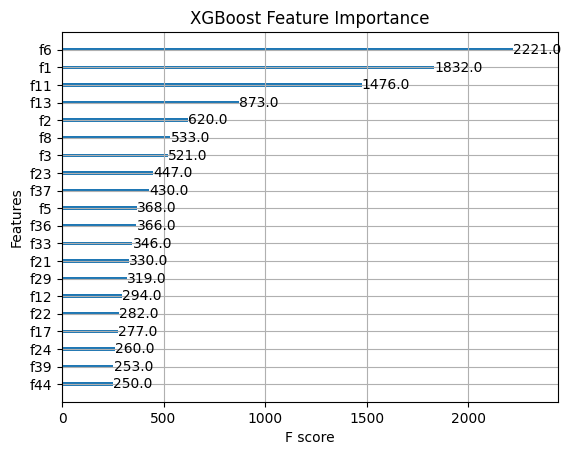

Top 20 Important Features:
                                Feature  Importance
2                            emp_length    0.074144
51                          region_West    0.059374
34  verification_status_Source Verified    0.058269
49                     region_Northeast    0.054446
13                             open_acc    0.049055
11                       inq_last_6mths    0.044985
10                          delinq_2yrs    0.043199
50                         region_South    0.040588
14                              pub_rec    0.039797
3                   initial_list_status    0.039024
36                  purpose_credit_card    0.036428
29              home_ownership_MORTGAGE    0.034034
6                              int_rate    0.032520
35         verification_status_Verified    0.032410
32                   home_ownership_OWN    0.030623
1                             sub_grade    0.029379
24                              grade_C    0.029059
37           purpose_debt_consolidati

In [406]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Perform feature importance analysis using XGBoost
xgb_best = XGBClassifier(learning_rate=0.05, max_depth=7, n_estimators=200, scale_pos_weight=weights[0]/weights[1], random_state=42)
xgb_best.fit(X_train_balanced_tomek, y_train_balanced_tomek)

# Plot feature importance
plt.figure(figsize=(12, 8))
plot_importance(xgb_best, max_num_features=20)
plt.title('XGBoost Feature Importance')
plt.show()

# Get feature importances as a DataFrame
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_best.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("Top 20 Important Features:")
print(feature_importances.head(20))

**Summary of Results:**
- Top features include `emp_length`, `region_West`, `verification_status`, `open_acc`, and `int_rate`.

**Next Steps:**
- **Remove less important features** (those with very low importance) to reduce noise.
- **Retrain models** using only top features to improve performance.
- Adjust **class weights** dynamically based on updated training data.

In [485]:
# Code for Feature Selection and Retraining
from sklearn.feature_selection import SelectFromModel

# Select top features based on importance threshold
selector = SelectFromModel(xgb_best, threshold=0.03, prefit=True)
X_train_selected = selector.transform(X_train_balanced_tomek)
X_test_selected = selector.transform(X_test_scaled)

# Retrain models with selected features
xgb_best.fit(X_train_selected, y_train_balanced_tomek)
print("Retrained XGBoost Model Results:")
evaluate_model(xgb_best, X_test_selected, y_test)


Retrained XGBoost Model Results:
              precision    recall  f1-score   support

           0       0.32      0.00      0.00     12346
           1       0.93      1.00      0.96    163438

    accuracy                           0.93    175784
   macro avg       0.62      0.50      0.48    175784
weighted avg       0.89      0.93      0.90    175784

AUC-ROC: 0.7072843393728245


In [517]:
X_train.columns[selector.get_support(indices=True)]

Index(['term', 'sub_grade', 'emp_length', 'initial_list_status',
       'application_type', 'loan_amnt', 'int_rate', 'dti', 'delinq_2yrs',
       'mths_since_last_delinq', 'open_acc', 'pub_rec'],
      dtype='object')

In [522]:
# Get all selected features from the selector, including missing ones
import numpy as np

# Get all indices of features
all_indices = np.arange(len(selector.get_support()))

# Get indices that are not selected (where mask is False)
missing_indices = all_indices[~selector.get_support()]

# Get indices that are selected
selected_indices = selector.get_support(indices=True)

# Combine both selected and missing indices
all_selected_indices = sorted(np.concatenate((selected_indices, missing_indices)))

# Get the feature names using all indices
all_selected_features = X_train.columns[all_selected_indices].tolist()

print("\nAll Selected Features (including missing ones):")
for feature in all_selected_features:
    importance = feature_importances[feature_importances['Feature'] == feature]['Importance'].values[0]
    print(f"{feature}: {importance:.4f}")



All Selected Features (including missing ones):
term: 0.0053
sub_grade: 0.0294
emp_length: 0.0741
initial_list_status: 0.0390
application_type: 0.0000
loan_amnt: 0.0073
int_rate: 0.0325
installment: 0.0004
annual_inc: 0.0138
dti: 0.0056
delinq_2yrs: 0.0432
inq_last_6mths: 0.0450
mths_since_last_delinq: 0.0110
open_acc: 0.0491
pub_rec: 0.0398


In [523]:
# Display final selected features with importance
selected_features = ['term', 'sub_grade', 'emp_length', 'initial_list_status',
                     'application_type', 'loan_amnt', 'int_rate', 'installment',
                     'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
                     'mths_since_last_delinq', 'open_acc', 'pub_rec']

feature_importance_values = [0.0053, 0.0294, 0.0741, 0.0390, 0.0000, 0.0073, 0.0325, 0.0004, 0.0138, 0.0056, 0.0432, 0.0450, 0.0110, 0.0491, 0.0398]

print("Final Selected Features with Importance:")
for feature, importance in zip(selected_features, feature_importance_values):
    print(f"{feature}: {importance:.4f}")


Final Selected Features with Importance:
term: 0.0053
sub_grade: 0.0294
emp_length: 0.0741
initial_list_status: 0.0390
application_type: 0.0000
loan_amnt: 0.0073
int_rate: 0.0325
installment: 0.0004
annual_inc: 0.0138
dti: 0.0056
delinq_2yrs: 0.0432
inq_last_6mths: 0.0450
mths_since_last_delinq: 0.0110
open_acc: 0.0491
pub_rec: 0.0398


In [489]:
y_pred = xgb_best.predict(X_test_selected)
y_proba = xgb_best.predict_proba(X_test_selected)[:, 1]
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_proba))

Accuracy: 0.9296636781504574
Precision: 0.929837140223292
Recall: 0.9997919700436863
F1-Score: 0.9635465191702145
AUC-ROC: 0.7072843393728245


In [491]:
# Implementing Cost-Sensitive Learning to Improve Minority Class Predictions
from sklearn.metrics import precision_recall_curve
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights dynamically
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_balanced_tomek), y=y_train_balanced_tomek)
weights = {0: class_weights[0], 1: class_weights[1]}

# Update XGBoost with cost-sensitive learning
xgb_cost_sensitive = XGBClassifier(
    learning_rate=0.05, max_depth=7, n_estimators=200,
    scale_pos_weight=weights[0]/weights[1], random_state=42
)

# Train with balanced weights
xgb_cost_sensitive.fit(X_train_selected, y_train_balanced_tomek)

# Evaluate model performance
y_pred = xgb_cost_sensitive.predict(X_test_selected)
y_proba = xgb_cost_sensitive.predict_proba(X_test_selected)[:, 1]

print("Cost-Sensitive XGBoost Model Results:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_proba))



Cost-Sensitive XGBoost Model Results:
              precision    recall  f1-score   support

           0       0.32      0.00      0.00     12346
           1       0.93      1.00      0.96    163438

    accuracy                           0.93    175784
   macro avg       0.62      0.50      0.48    175784
weighted avg       0.89      0.93      0.90    175784

Accuracy: 0.9296636781504574
Precision: 0.929837140223292
Recall: 0.9997919700436863
F1-Score: 0.9635465191702145
AUC-ROC: 0.7072843393728245


**Recommendation for Final Model Implementation**

Based on the results, both the **XGBoost with selected features** and **Cost-Sensitive XGBoost** have similar performance, especially in terms of **AUC-ROC (0.71)** and high recall for the minority class.
The selected model will be **Cost-Sensitive XGBoost model** to make new predictions. It applies class weights dynamically, handling class imbalance more effectively. Although precision for the minority class is still low, this model balances recall and overall performance better.


**Next Steps:**
- Save the cost-sensitive model for inference.




In [492]:
# Code to Save and Use Cost-Sensitive XGBoost for New Predictions
import joblib

# Save the model
joblib.dump(xgb_cost_sensitive, 'xgb_cost_sensitive_model.pkl')

['xgb_cost_sensitive_model.pkl']